## Radial Basis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def radbasis(x,c,s):
    
    return np.exp(-((x-c)**2)/(2*(s)**2))

In [3]:
net_shape=[1,3,1]
nn = {}
np.random.seed(24)

In [4]:
data = pd.read_csv('DATA2.csv',delimiter = ',')
X = np.squeeze(data.drop(columns=['Y'],axis=1))
y = np.squeeze(data.drop(columns=['X'],axis=1))

In [5]:
k = net_shape[1]
def rand(x,k):
    
    centers = np.random.choice(x,size=k)
    mean = np.mean(centers)
    sum = 0
    for i in range(len(centers)):
        
        sum += (centers[i]-mean)**2
    
    sigma = (sum/(len(centers)-1))**0.5
    
    return centers,sigma

In [6]:
nn['W'] = np.random.randn(k)
nn['B'] = np.random.randn(1)
nn['A'] = np.zeros(k)

In [7]:
centers,sigma = rand(X,k)

In [8]:
def Train(x,y,k,lrate,epoc,nn):
    
    for epoch in range(epoc):
        
        for i in range(x.shape[0]):
            #  Forward pass
            
            for j in range(k):
                
                nn['A'][j] = np.array(radbasis(x[i],centers[j],sigma))
            
            F = nn['A'].T.dot(nn['W']) + nn['B']
            
            # Back propagation
            error = 0.5*(y[i]-F)**2
            error_der = -(y[i]-F).flatten()
            
            # Deltas
            deltaW  =  lrate*nn['A']*error_der
            deltaB  =  lrate*error_der
            
            # Update
            
            nn['W'] = nn['W'] - deltaW
            nn['B'] = nn['B'] - deltaB
            
        if epoch%500 == 0:
            print('Error at Epoch {} is: {}'.format(epoch,error[0]))
    
    return nn

In [9]:
def predict(x,centers,sigma,nn):
    y_pred = []
    for i in range(x.shape[0]):
        
        for j in range(k):
            
            nn['A'][j] = np.array(radbasis(x[i],centers[j],sigma))
            
        F = nn['A'].T.dot(nn['W']) + nn['B']
        
        y_pred.append(F)
        
    return np.array(y_pred)

In [10]:
nn = Train(X,y,k,0.01,10000,nn)

Error at Epoch 0 is: 0.46151287287867354
Error at Epoch 500 is: 0.010155486592111334
Error at Epoch 1000 is: 0.004284744716410784
Error at Epoch 1500 is: 0.0024724695777756807
Error at Epoch 2000 is: 0.0012659081136455269
Error at Epoch 2500 is: 0.0005087348158429862
Error at Epoch 3000 is: 0.00011141372876651972
Error at Epoch 3500 is: 2.507765757887609e-07
Error at Epoch 4000 is: 0.00011421681786012461
Error at Epoch 4500 is: 0.00040290441786697756
Error at Epoch 5000 is: 0.0008248125362957226
Error at Epoch 5500 is: 0.0013458992195871187
Error at Epoch 6000 is: 0.0019383609852630396
Error at Epoch 6500 is: 0.002579604012047499
Error at Epoch 7000 is: 0.003251377572227956
Error at Epoch 7500 is: 0.003939044655813905
Error at Epoch 8000 is: 0.00463096856355131
Error at Epoch 8500 is: 0.00531799749165099
Error at Epoch 9000 is: 0.005993031883341165
Error at Epoch 9500 is: 0.006650661655890153


In [11]:
y_pred = predict(X,centers,sigma,nn)

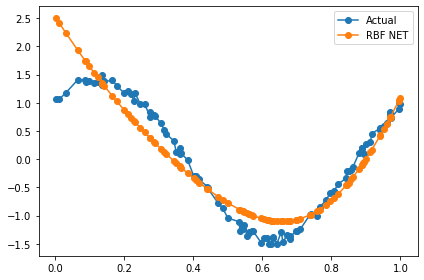

In [12]:
plt.plot(X,y,'-o',label = 'Actual')
plt.plot(X,y_pred,'-o',label = 'RBF NET')
plt.legend()
plt.tight_layout()

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [14]:
nn = Train(np.array(X_train),np.array(y_train),k,0.005,10000,nn)

Error at Epoch 0 is: 0.0019216938494700901
Error at Epoch 500 is: 0.0005122347831550028
Error at Epoch 1000 is: 0.00018741241592261918
Error at Epoch 1500 is: 9.808894312512997e-05
Error at Epoch 2000 is: 5.067557502275572e-05
Error at Epoch 2500 is: 2.102491225263076e-05
Error at Epoch 3000 is: 4.695724355981731e-06
Error at Epoch 3500 is: 2.6661081505076693e-08
Error at Epoch 4000 is: 5.820620476957573e-06
Error at Epoch 4500 is: 2.10176488840147e-05
Error at Epoch 5000 is: 4.46462902999599e-05
Error at Epoch 5500 is: 7.58126101716531e-05
Error at Epoch 6000 is: 0.00011369415702527924
Error at Epoch 6500 is: 0.00015753475256786718
Error at Epoch 7000 is: 0.00020663966021208972
Error at Epoch 7500 is: 0.00026037108457245247
Error at Epoch 8000 is: 0.00031814398383719916
Error at Epoch 8500 is: 0.00037942217578537066
Error at Epoch 9000 is: 0.00044371471790047464
Error at Epoch 9500 is: 0.000510572542843498


In [15]:
y_pred = predict(np.array(X_test),centers,sigma,nn)

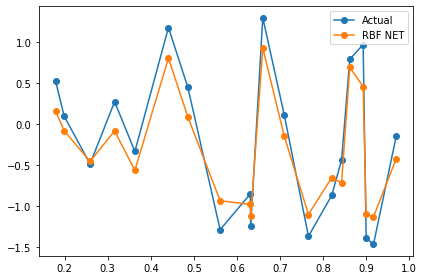

In [16]:
plt.plot(np.sort(X_test),np.array(y_test),'-o',label = 'Actual')
plt.plot(np.sort(X_test),np.array(y_pred),'-o',label = 'RBF NET')
plt.legend()
plt.tight_layout()